In [1]:
import pandas as pd
import requests
from io import BytesIO
import xgboost as xgb
from category_encoders import TargetEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn import metrics
import advertools as adv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import plotly.express as px
import pickle
from xgboost import plot_importance
import plotly.graph_objects as go
import warnings
import optuna
from fitter import Fitter
warnings.filterwarnings('ignore')
import matplotlib. pyplot as plt 

In [2]:
df = pd.read_csv("/Users/birsenbas/Desktop/Kodluyoruz/finalProject/2019-2020-ismek-kesin-kaytl-kursiyer-verileri.csv", encoding="ISO-8859-1", error_bad_lines=False, delimiter=";")

In [90]:
df.head(10)

,Donem,Egitim Durumu,Engel Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi
0,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
1,2019-2020,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi
3,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
5,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Ismek Sertifika,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
6,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Ismek Sertifika,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
7,2019-2020,Lise,Engeli Olmayan,Calismiyor,Moda Tasarimi Ve Tekstil Teknolojisi,Giyim Uretiminde Temel Islemler,Hak Etmedi,Bagcilar Kirazli,Bagcilar,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
8,2019-2020,Lisans,Engeli Olmayan,Calismiyor,Gastronomi Ve Mutfak Sanatlari,Hamur Teknikleri,Hak Etmedi,K.Cekmece Halkali Toplu Konutlar,Kucukcekmece,Uretim Yaparak Gelir Elde Etmek,40-50 Yas Arasi
9,2019-2020,Lisans,Engeli Olmayan,Calismiyor,Gastronomi Ve Mutfak Sanatlari,Pastaci Ciragi,Meb Sertifika,K.Cekmece Halkali Toplu Konutlar,Kucukcekmece,Uretim Yaparak Gelir Elde Etmek,40-50 Yas Arasi


In [3]:
df = df.drop(["Donem", "Engel Durumu"], axis=1)

In [4]:
df

,Egitim Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi
0,Lisans,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
1,Lise,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,Lisans,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi
3,Lisans,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,Lisans,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
...,...,...,...,...,...,...,...,...,...
216760,Lisans,Calismiyor,Bilisim Teknolojileri,Powerpoint 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi
216761,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Illustrator Cizim Uygulamalari 3,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
216762,Lisans,Ogrenci,Bilisim Teknolojileri,Egitimde Google Classroom Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
216763,Lisans,Ogrenci,Bilisim Teknolojileri,Excel 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi


# create new features

In [18]:
def Uzaktan(df):
    if df["Kurs Merkezi"] == "Uzaktan Egitim":
        return 1
    else:
        return 0
    
df["Uzaktan"] = df.apply(lambda df:Uzaktan(df), axis=1)

In [5]:
def Meslek(df):
    if df["Tercih Sebebi"] == "Meslek Edinmek, Meslegimde Ýlerlemek" or df["Tercih Sebebi"] == "Uretim Yaparak Gelir Elde Etmek" or df["Tercih Sebebi"] == "Yeni Bir Meslek Edinmek":
        return 1
    else:
        return 0
    
df["Meslek"] = df.apply(lambda df:Meslek(df), axis=1)

In [6]:
def Calisan(df):
    if df["Calisma Durumu"] == "Calisiyor":
        return 1
    else:
        return 0
    
df["Calisan"] = df.apply(lambda df:Calisan(df), axis=1)

In [7]:
def GencKursiyer(df):
    if df["Yas Araligi"] == "20-30 Yas Arasi":
        return 1
    else:
        return 0
    
df["GencKursiyer"] = df.apply(lambda df:GencKursiyer(df), axis=1)

In [8]:
def Haketme(df):
    if df["Hak Edilen Belge Tipi"] == "Ismek Sertifika" or df["Hak Edilen Belge Tipi"] == "Meb Sertifika":
        return 1
    else:
        return 0
    
df["Haketme"] = df.apply(lambda df:Haketme(df), axis=1)

In [9]:
#üniversiteye gidenler ve yaşı genç olanlar

def UniversandGenc(df):
    if df["Egitim Durumu"] == "Üniversite" or df["Yas Araligi"] == "20-30 Yas Arasi":
        return 1
    else:
        return 0
    
df["UniversandGenc"] = df.apply(lambda df:UniversandGenc(df), axis=1)

In [11]:
#uzaktan ve yaşı genç olanlar

def UzaktandOgrenci(df):
    if df["Kurs Merkezi"] == "Uzaktan" or df["Yas Araligi"] == "20-30 Yas Arasi":
        return 1
    else:
        return 0
    
df["UzaktanOgrenci"] = df.apply(lambda df:UzaktandOgrenci(df), axis=1)

In [12]:
#uzaktan ve çalışıyor olanlar

def UzaktanCalisiyor(df):
    if df["Kurs Merkezi"] == "Uzaktan" or df["Calisma Durumu"] == "Calisiyor":
        return 1
    else:
        return 0
    
df["UzaktanCalisiyor"] = df.apply(lambda df:UzaktanCalisiyor(df), axis=1)

In [13]:
df

,Egitim Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ýlcesi,Tercih Sebebi,Yas Araligi,Meslek,Calisan,GencKursiyer,Haketme,UniversandGenc,UzaktanOgrenci,UzaktanCalisiyor
0,Lisans,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,1,0,1,1,0
1,Lise,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,0,0,1,1,1,1,0
2,Lisans,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi,1,0,0,1,0,0,0
3,Lisans,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0
4,Lisans,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216760,Lisans,Calismiyor,Bilisim Teknolojileri,Powerpoint 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,Sosyal Cevre Edinmek,40-50 Yas Arasi,0,0,0,0,0,0,0
216761,Lisans,Ogrenci,Grafik Ve Teknik Tasarim,Illustrator Cizim Uygulamalari 3,Ismek Sertifika,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,1,1,1,1,0
216762,Lisans,Ogrenci,Bilisim Teknolojileri,Egitimde Google Classroom Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,1,0,1,1,0
216763,Lisans,Ogrenci,Bilisim Teknolojileri,Excel 2019 Kullanimi,Hak Etmedi,Uzaktan Egitim,Esenler,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi,1,0,1,0,1,1,0


# haketme durumu model

In [14]:
from sklearn.preprocessing import LabelEncoder 
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
cat_cols = df.select_dtypes(include=["object"]).columns
df = MultiColumnLabelEncoder(columns = cat_cols).fit_transform(df)

In [19]:
X = df.drop(["Haketme", "Hak Edilen Belge Tipi"],axis=1)
y = df.Haketme

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 104, stratify=df.Haketme)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80     25237
           1       0.73      0.68      0.70     18116

    accuracy                           0.76     43353
   macro avg       0.75      0.75      0.75     43353
weighted avg       0.76      0.76      0.76     43353



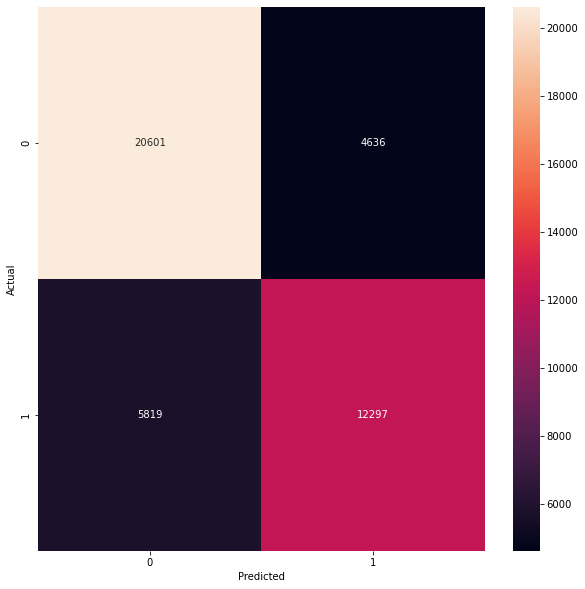

In [20]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train,y_train)

pred = xgb_cl.predict(X_test)
conf_mat = confusion_matrix(y_test, pred)
print(metrics.classification_report(y_test,pred))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

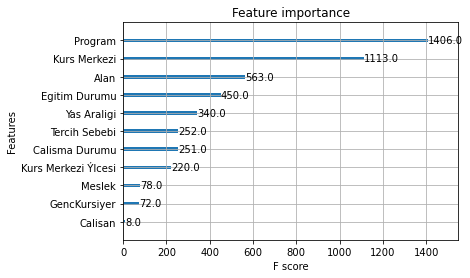

In [21]:
plot_importance(xgb_cl)

sonuç: modelin ilk hali fena değil ama geliştirmeler hep Alan üzerinden yapıldı. Haketme tahmini için de dataset biraz geliştirilebilir. ve sonrasında 2 model de projede sunulabilir.